In [1]:
%matplotlib inline

In [2]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

#### 7.1 선형 판별 분석법과 이차 판별 분석법

In [12]:
# 가능도 계산
# 정상인의 체온 범위 평균 37.5, 표준편차 0.1 일때
rv_normal = sp.stats.norm(loc = 37.5, scale = 0.1)

In [18]:
# 체온이 37.8일때 정상일 확률
rv_normal.pdf(37.8)

0.044318484119383855

In [14]:
# 독감에 걸린 사람의 체온 평균 40.1, 표준편차 0.2 일때
rv_flu = sp.stats.norm(loc=40.1, scale = 0.2)

In [16]:
# 체온이 38.5도일때 독감일 확률 현저히 낮음
rv_flu.pdf(38.5)

2.5261355417683027e-14

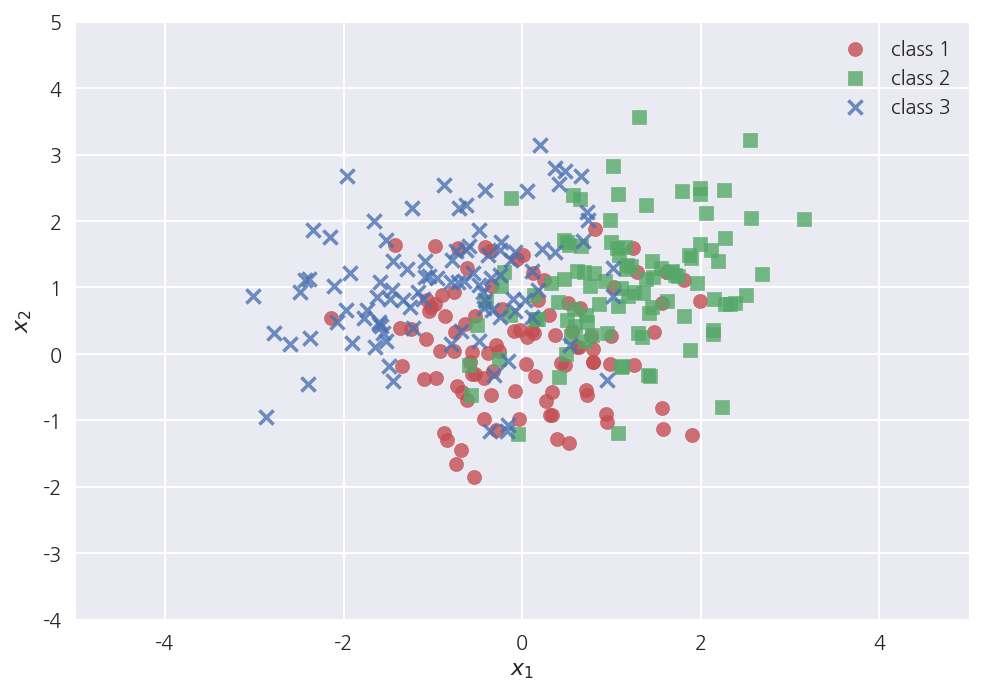

In [34]:
N = 100
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

##### 이차판별분석법
- priors_: 각 클래스  k 의 사전확률.
- means_: 각 클래스  k 에서  x 의 기댓값 벡터  μk 의 추정치 벡터.
- covariance_: 각 클래스  k 에서  x 의 공분산 행렬  Σk 의 추정치 행렬. (생성자 인수 store_covariance 값- 이 True인 경우에만 제공)

##### QDA

In [4]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

In [5]:
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [6]:
# mu1, mu2, mu3 구한것
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [20]:
# sigma1
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [21]:
# sigma2
qda.covariance_[1]

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [22]:
# 예제 빨간색이면서 2,-1일 확률, 파란색이면서 2, -1일 확률 등등
# 가능도를 구하는 것
rv1 = sp.stats.multivariate_normal(X1.mean(axis=0), np.cov(X1.T))
rv2 = sp.stats.multivariate_normal(X2.mean(axis=0), np.cov(X2.T))
rv3 = sp.stats.multivariate_normal(X3.mean(axis=0), np.cov(X3.T))
# p([2,-1] | y = 3), p([2,-1] | y = 2), ([2,-1] | y = 3)
rv1.pdf([2, -1]), rv2.pdf([2, -1]), rv3.pdf([2, -1])

(0.0065621236568562755, 0.0034060346804690644, 1.5412251295786176e-05)

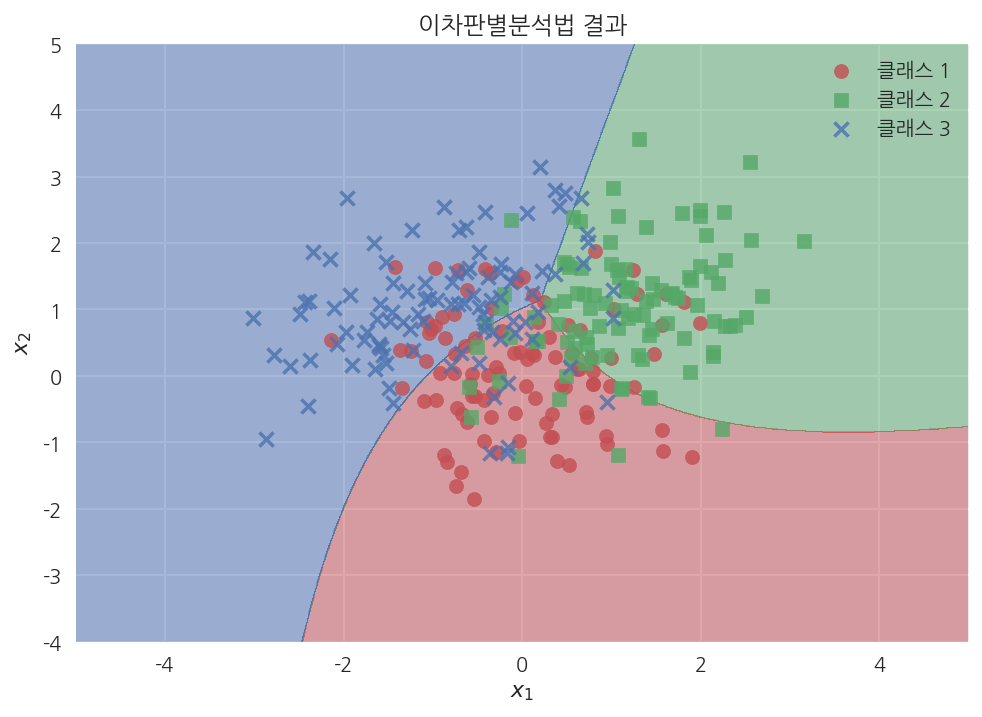

In [9]:
# 이 혹률분포를 사용하여 분류한 결과
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="클래스 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="클래스 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="클래스 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("이차판별분석법 결과")
plt.legend()
plt.show()

##### 연습문제
- QDA를 사용하여 붓꽃 분류문제 풀고 ROC커브

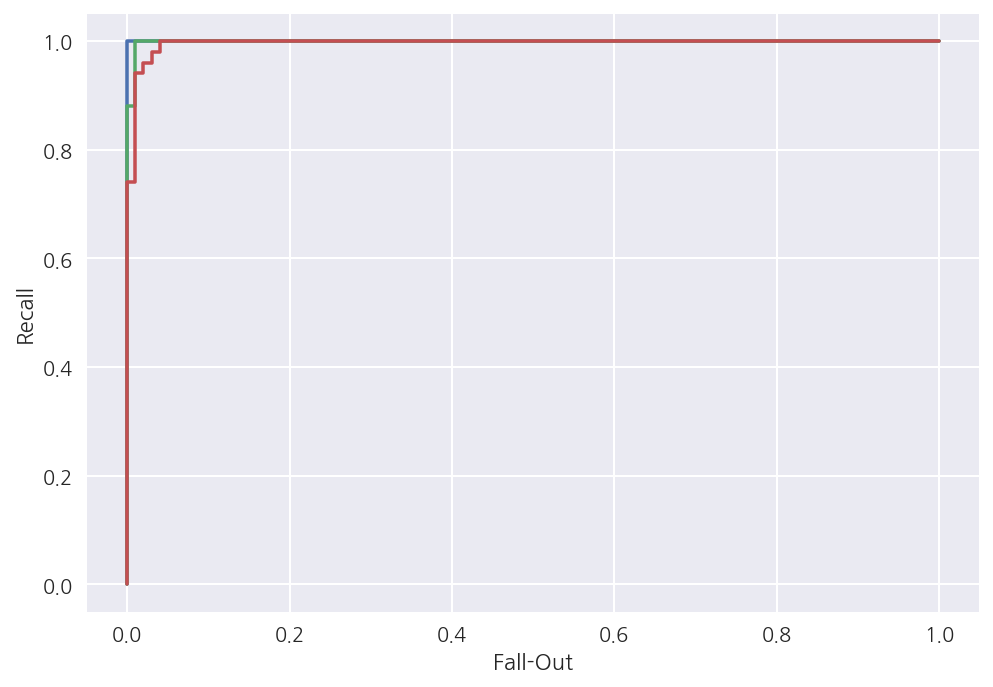

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

iris = load_iris()
X = iris.data
# label_binalize: 원핫 인코딩을 수행함
y = label_binarize(iris.target, [0, 1, 2])

# memory allocation
fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for x in range(3):
    model = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y[:, x])
    fpr[x], tpr[x], thr[x] = roc_curve(y[:, x], model.predict_proba(X)[:, 1])
    plt.plot(fpr[x], tpr[x])
    
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.show()

##### LDA

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(
    n_components=3, solver="svd", store_covariance=True).fit(X, y)

In [36]:
# 선형판별분석법은 기댓값 벡터만 클래스에 따라 달라지고 공분산 행렬은 공통으로 추정
lda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [37]:
lda.covariance_

array([[0.7718516 , 0.13942905],
       [0.13942905, 0.7620019 ]])

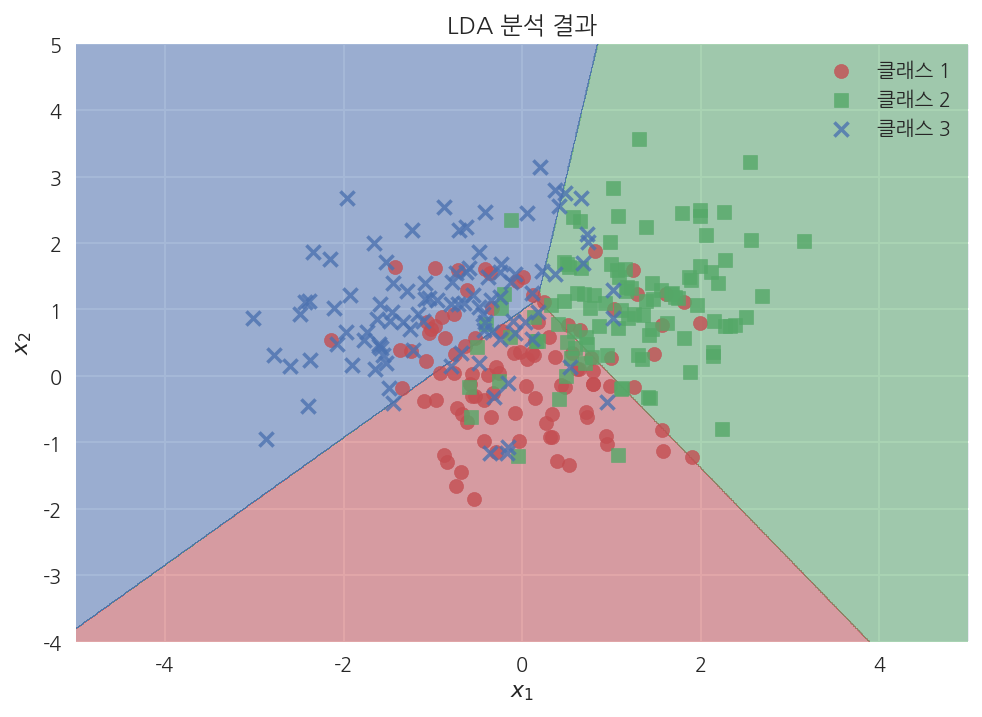

In [38]:
# 결과는 직선인 경계선을 가짐
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(lda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="클래스 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="클래스 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="클래스 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title("LDA 분석 결과")
plt.show()

##### 연습문제2
- LDA를 사용하여 붓꽃 분류문제를 풀고 ROC커브

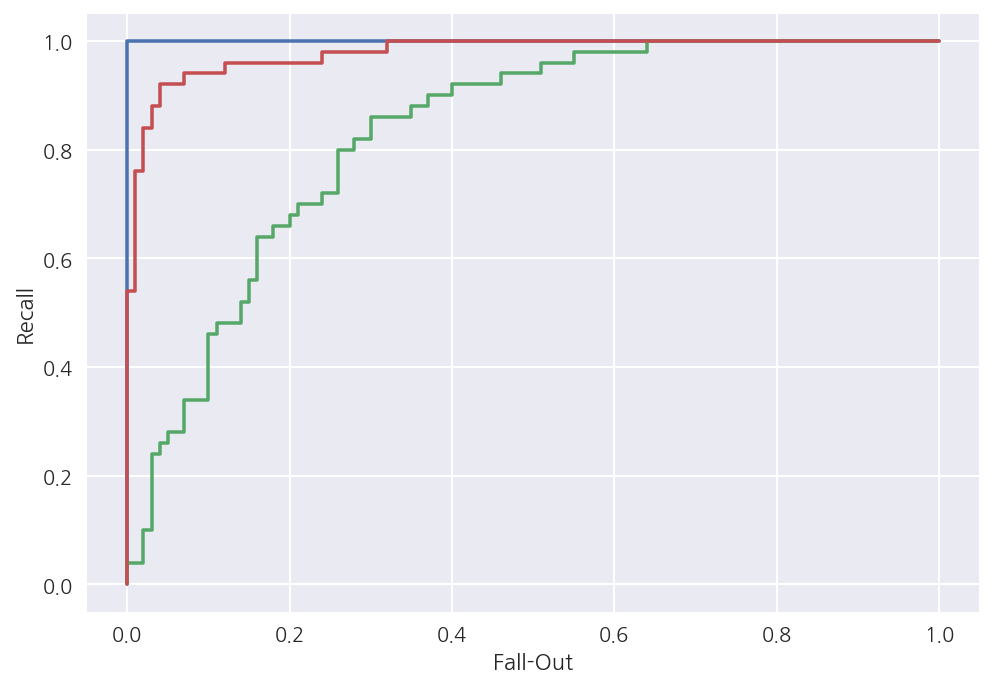

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
X = iris.data
# label_binalize: 원핫 인코딩을 수행함
y = label_binarize(iris.target, [0, 1, 2])

# memory allocation
fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for x in range(3):
    model = LinearDiscriminantAnalysis(store_covariance=True).fit(X, y[:, x])
    fpr[x], tpr[x], thr[x] = roc_curve(y[:, x], model.predict_proba(X)[:, 1])
    plt.plot(fpr[x], tpr[x])
    
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.show()

#### 나이브베이즈 분류모형
- 조건부독립과 무조건부 독립은 관계가 없음
$$P(A,B) = P(A)P(B) \;\; !{\implies} \;\; P(A,B|C) = P(A|C)P(B|C)$$
$$P(A,B|C) = P(A|C)P(B|C) \;\; !{\implies} \;\; P(A,B) = P(A)P(B)$$

- naive_bayes 서브패키지에서 제공하는 모형 클래스
        - GaussianNB: 정규분포 나이브베이즈
        - BernoulliNB: 베르누이분포 나이브베이즈
        - MultinomialNB: 다항분포 나이브베이즈
        
- 사전 확률과 관련된 속성
        - classes_ : 종속변수 Y의 클래스(라벨)
        - class_count_ : 종속변수 Y의 값이 특정한 클래스인 표본 데이터의 수
        - class_prior_ : 종속변수 Y의 무조건부 확률분포  P(Y)  (정규분포의 경우에만)
        - class_log_prior_ : 종속변수 Y의 무조건부 확률분포의 로그  logP(Y)  (베르누이분포나 다항분포의 경우에만)

In [40]:
np.random.seed(0)
C = np.random.normal(100, 15, 2000)
A = C + np.random.normal(0, 5, 2000)
B = C + np.random.normal(0, 5, 2000)

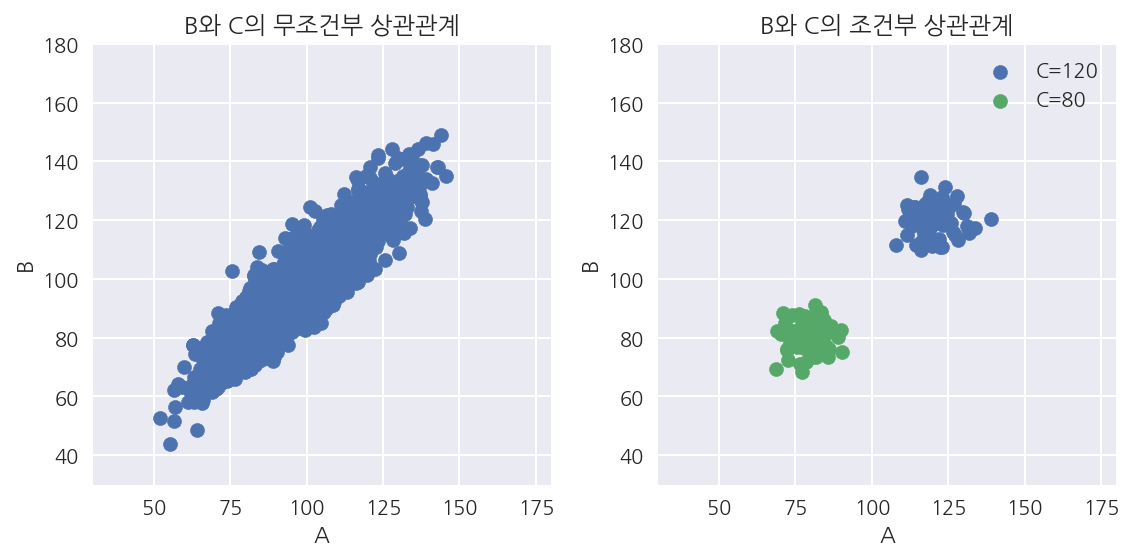

In [41]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter(A, B)
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.title("B와 C의 무조건부 상관관계")

plt.subplot(122)
idx1 = (118 < C) & (C < 122)
idx2 = (78 < C) & (C < 82)
plt.scatter(A[idx1], B[idx1], label="C=120")
plt.scatter(A[idx2], B[idx2], label="C=80")
plt.xlabel("A")
plt.ylabel("B")
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.legend()
plt.title("B와 C의 조건부 상관관계")

plt.tight_layout()
plt.show()

##### 정규분포 나이브베이즈 모형
- 가능도 추정과 관련된 속성
    - theta_: 정규분포의 기댓값 $\mu$ 
    - sigma_: 정규분포의 분산 $\sigma^2$

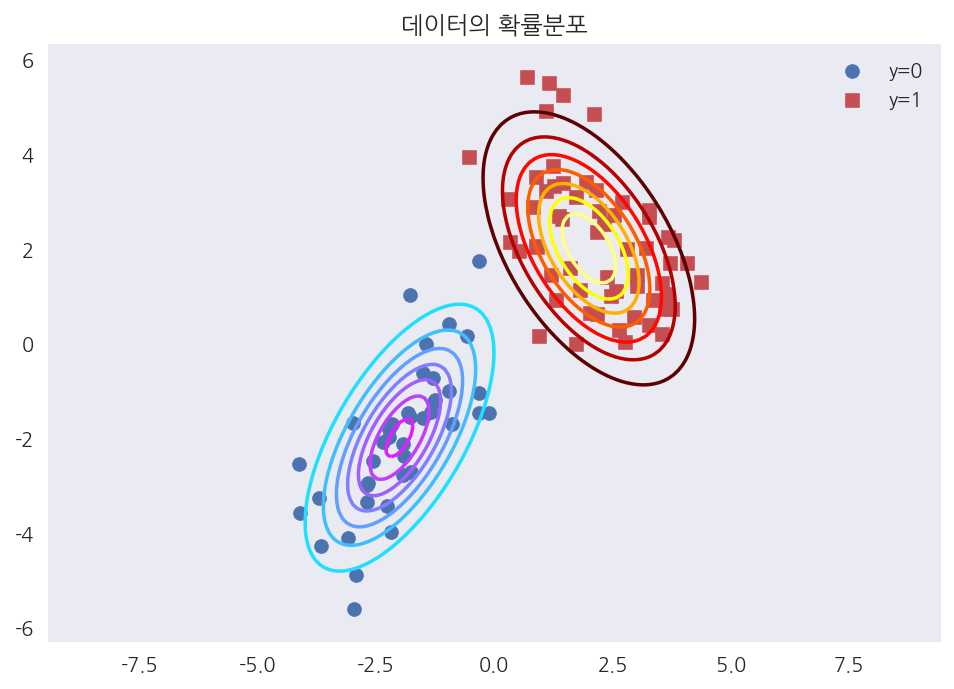

In [66]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")
plt.legend()
plt.title("데이터의 확률분포")
plt.axis("equal")
plt.show()

In [43]:
# 위 데이터를 가우시안 나이브베이즈 모형으로 품
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

In [44]:
# 종속변수 Y의 클래스(라벨)
model_norm.classes_

array([0., 1.])

In [45]:
# 종속변수 Y의 값이 특정한 클래스인 표본 데이터의 수
model_norm.class_count_

array([40., 60.])

In [46]:
# 종속변수 Y의 무조건부 확률분포 P(Y)
model_norm.class_prior_

array([0.4, 0.6])

In [49]:
# 각 클래스에 따라 x가 이루는 확률분포의 모수 계산
model_norm.theta_[0], model_norm.sigma_[0]

(array([-1.96197643, -2.00597903]), array([1.02398854, 2.31390497]))

In [48]:
model_norm.theta_[1], model_norm.sigma_[1]

(array([2.19130701, 2.12626716]), array([1.25429371, 1.93742544]))

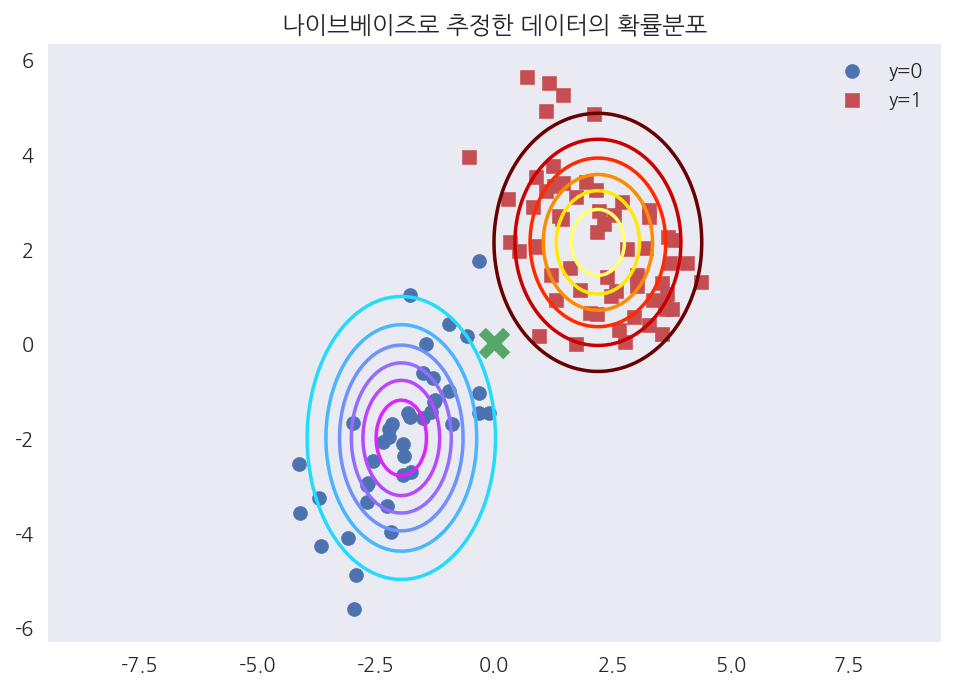

In [50]:
# 위에서 구한 데이터의 확률분포를 시각화
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")

x_new = [0, 0]
plt.scatter(x_new[0], x_new[1], c="g", marker="x", s=150, linewidth=5)
plt.legend()
plt.title("나이브베이즈로 추정한 데이터의 확률분포")
plt.axis("equal")
plt.show()

In [51]:
# 위의 모형을 사용하여 x_new = (0,0)인 데이터의 y값을 예측
model_norm.predict_proba([x_new])

array([[0.48475244, 0.51524756]])

In [52]:
# y값이 나오는 중간 과정
# 나이브베이즈 가정에 따라 두 입력 변수의 곱을 결합 확률로 계산
likelihood = [
    (sp.stats.norm(model_norm.theta_[0][0], np.sqrt(model_norm.sigma_[0][0])).pdf(x_new[0]) * \
     sp.stats.norm(model_norm.theta_[0][1], np.sqrt(model_norm.sigma_[0][1])).pdf(x_new[1])),
    (sp.stats.norm(model_norm.theta_[1][0], np.sqrt(model_norm.sigma_[1][0])).pdf(x_new[0]) * \
     sp.stats.norm(model_norm.theta_[1][1], np.sqrt(model_norm.sigma_[1][1])).pdf(x_new[1])),
]
likelihood

[0.006615760017637298, 0.00468796559514829]

In [53]:
# 사전 확률을 곱하면 사후 확률에 비례하는 값이 나옴
posterior = likelihood * model_norm.class_prior_
posterior

array([0.0026463 , 0.00281278])

In [54]:
# 이 값을 정규화
posterior / posterior.sum()

array([0.48475244, 0.51524756])

##### 연습문제

In [73]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
# label_binalize: 원핫 인코딩을 수행함
y = iris.target

In [74]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

In [75]:
model_norm.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [76]:
model_norm.theta_[0], model_norm.sigma_[0]

(array([5.006, 3.428, 1.462, 0.246]),
 array([0.121764, 0.140816, 0.029556, 0.010884]))

In [77]:
model_norm.theta_[1], model_norm.sigma_[1]

(array([5.936, 2.77 , 4.26 , 1.326]),
 array([0.261104, 0.0965  , 0.2164  , 0.038324]))

In [78]:
model_norm.theta_[2], model_norm.sigma_[2]

(array([6.588, 2.974, 5.552, 2.026]),
 array([0.396256, 0.101924, 0.298496, 0.073924]))

In [79]:
y_pred = model_norm.predict(X)

In [85]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        50
     class 1       0.94      0.94      0.94        50
     class 2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



##### 베르누이분포 나이브베이즈 모형
- 베르누이분포 나이브베이즈 모형 클래스 BernoulliNB는 가능도 추정과 관련 속성
        - feature_count_: 각 클래스  k 에 대해  d 번째 동전이 앞면이 나온 횟수  Nd,k 
        - feature_log_prob_: 베르누이분포 모수의 로그
$$\log \mu_k = (\log \mu_{1,k}, \ldots, \log \mu_{D, k}) = \left( \log \dfrac{N_{1,k}}{N_k}, \ldots, \log \dfrac{N_{D,k}}{N_k} \right)$$

In [86]:
# 4개의 키워드를 사용하여 정상 메일 4개와 스팸 메일 6개를 BOW인코딩한 행렬
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [87]:
# 베르누이 나이브베이즈 모형으로 예측
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

In [88]:
# 클래스의 종류
model_bern.classes_

array([0, 1])

In [89]:
# 각 클래스에 속하는 표본의 수
model_bern.class_count_

array([4., 6.])

In [90]:
# 사전 확률(log를 취한 값을 반환해줌)
np.exp(model_bern.class_log_prior_)

array([0.4, 0.6])

In [91]:
# 각 클래스 k 별로, 각 독립변수 d 별로 서로 다른 베르누이 확률 변수라고 가정
# 모두 8개의 베르누이 확률변수의 모수를 구함
fc = model_bern.feature_count_
fc

array([[2., 4., 3., 1.],
       [2., 3., 5., 3.]])

In [92]:
# 모형 내에서 구한 값과 다름 -> 스무딩을 했기 때무ㅜㄴ
# 가상 데이터를 추가해 추정한 모수의 값이 좀 더 0.5에 가까워지도록함
fc / np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

In [93]:
# 스무딩 가중치 값
model_bern.alpha

1.0

In [94]:
# 스무딩이 적용된 베르누이 모수값
theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

In [101]:
# 모형을 테스트 데이터를 사용하여 예측 실험
# 1번 2번 키워드가 포함된 경우
x_new = np.array([1, 1, 0, 0])

In [102]:
# 정상 메일일 가능성이 약 3배 더 높음
model_bern.predict_proba([x_new])

array([[0.72480181, 0.27519819]])

In [97]:
p = ((theta ** x_new) * (1 - theta) ** (1 - x_new)).prod(axis=1)\
    * np.exp(model_bern.class_log_prior_)
p / p.sum()

array([0.34501348, 0.65498652])

In [104]:
# 3번 4번 키워드가 포함된 경우
x_new = np.array([0, 0, 1, 1])

In [105]:
# 스팸메일일 확률이 90%임
model_bern.predict_proba([x_new])

array([[0.09530901, 0.90469099]])

In [106]:
p = ((theta ** x_new) * (1 - theta) ** (1 - x_new)).prod(axis=1)\
    * np.exp(model_bern.class_log_prior_)
p / p.sum()

array([0.09530901, 0.90469099])

##### 연습문제
        - MNIST 숫자 분류문제에서 sklearn.preprocessing.Binarizer로 x값을 0, 1로 바꾼다(값이 8 이상이면 1, 8 미만이면 0). 즉 흰색과 검은색 픽셀로만 구성된 이미지로 만든다

In [107]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
from sklearn.preprocessing import Binarizer
# 8이상이면 1, 8미만은 0
X = Binarizer(7).fit_transform(X)

In [108]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

In [109]:
model_bern.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [114]:
y_pred =  model_bern.predict(X)

In [115]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y, y_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       0.80      0.80      0.80       182
           2       0.91      0.90      0.91       177
           3       0.93      0.85      0.89       183
           4       0.96      0.94      0.95       181
           5       0.92      0.88      0.90       182
           6       0.97      0.96      0.97       181
           7       0.91      0.99      0.95       179
           8       0.80      0.82      0.81       174
           9       0.80      0.87      0.83       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



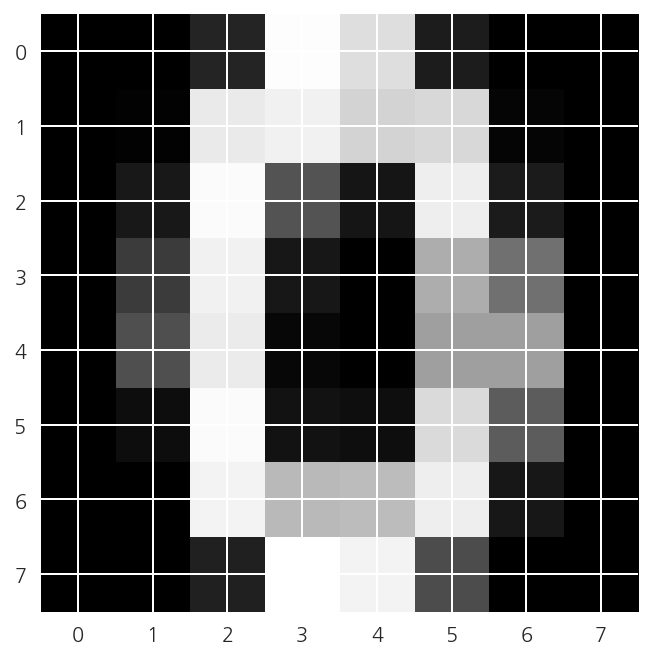

In [119]:
theta = np.exp(model_bern.feature_log_prob_)
aa = np.reshape(theta[0], (8,8))
plt.imshow(aa, cmap="gray")
plt.show()